In [16]:
import matplotlib.pyplot as plt
import pickle
import torch

In [8]:
plt.rcParams.update({'font.size': 16})

In [9]:
train_loss = [0.1054,0.0987,0.0932,0.0887,0.0871,0.0863,0.0858,0.0855,0.0848,0.0843,0.0832,0.0816,0.0805,0.0794,0.0791,0.0785,0.0778,0.0774,0.0773,0.0772,0.0768,0.0764,0.0762,0.0763,0.0759,0.0758,0.0753,0.0753]
val_loss = [0.0987, 0.0937, 0.0882, 0.0843, 0.0839, 0.0834, 0.0835, 0.0830, 0.0816, 0.0815, 0.0795, 0.0784, 0.0765, 0.0768, 0.0766, 0.0753, 0.0756, 0.0749, 0.0753, 0.0752, 0.0756, 0.0748, 0.0747, 0.0747, 0.0747, 0.0741, 0.0741, 0.0745]

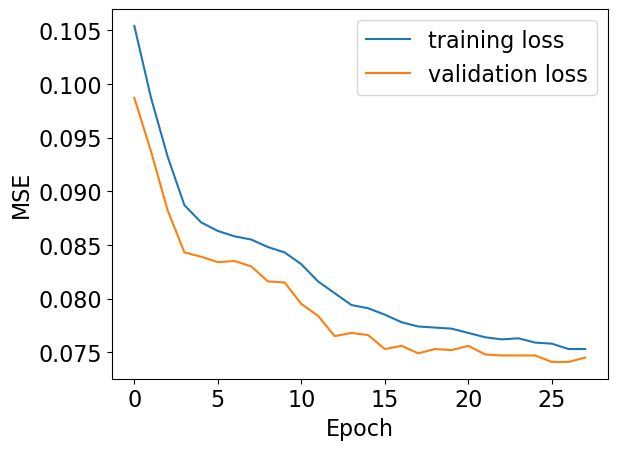

In [10]:
plt.plot(train_loss, label="training loss")
plt.plot(val_loss,  label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [12]:
with open("/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/CNN_predicted_values.pickle", "rb") as f:
    data = pickle.load(f)

In [14]:
targets = data[0]
outputs = data[1]

In [20]:
data_for_df = {"J EE Predicted": [],
               "J EI Predicted": [],
               "J IE Predicted": [],
               "J II Predicted": [],
               "P EE Predicted": [],
               "P EI Predicted": [],
               "P IE Predicted": [],
               "P II Predicted": [],
               "w EE Predicted": [],
               "w EI Predicted": [],
               "w IE Predicted": [],
               "w II Predicted": [],
               
               "J EE Actual": [],
               "J EI Actual": [],
               "J IE Actual": [],
               "J II Actual": [],
               "P EE Actual": [],
               "P EI Actual": [],
               "P IE Actual": [],
               "P II Actual": [],
               "w EE Actual": [],
               "w EI Actual": [],
               "w IE Actual": [],
               "w II Actual": [],}


scale = torch.tensor([100, 100, 100, 100, 1, 1, 1, 1, 180, 180, 180, 180])
for target, output in zip(targets, outputs):
    current_target = target.squeeze() * scale
    current_output = output.squeeze() * scale


    data_for_df["J EE Predicted"].append(float(current_output[0]))
    data_for_df["J EI Predicted"].append(float(current_output[1]))
    data_for_df["J IE Predicted"].append(float(current_output[2]))
    data_for_df["J II Predicted"].append(float(current_output[3]))

    data_for_df["P EE Predicted"].append(float(current_output[4]))
    data_for_df["P EI Predicted"].append(float(current_output[5]))
    data_for_df["P IE Predicted"].append(float(current_output[6]))
    data_for_df["P II Predicted"].append(float(current_output[7]))

    data_for_df["w EE Predicted"].append(float(current_output[8]))
    data_for_df["w EI Predicted"].append(float(current_output[9]))
    data_for_df["w IE Predicted"].append(float(current_output[10]))
    data_for_df["w II Predicted"].append(float(current_output[11]))

    data_for_df["J EE Actual"].append(float(current_target[0]))
    data_for_df["J EI Actual"].append(float(current_target[1]))
    data_for_df["J IE Actual"].append(float(current_target[2]))
    data_for_df["J II Actual"].append(float(current_target[3]))

    data_for_df["P EE Actual"].append(float(current_target[4]))
    data_for_df["P EI Actual"].append(float(current_target[5]))
    data_for_df["P IE Actual"].append(float(current_target[6]))
    data_for_df["P II Actual"].append(float(current_target[7]))

    data_for_df["w EE Actual"].append(float(current_target[8]))
    data_for_df["w EI Actual"].append(float(current_target[9]))
    data_for_df["w IE Actual"].append(float(current_target[10]))
    data_for_df["w II Actual"].append(float(current_target[11]))


In [18]:
def plot_scatter(value, min_x, max_x, min_y, max_y):
    x = torch.arange(0, 200, 1)
    y = x
    plt.plot(x, y, color="gray")
    plt.scatter(x=data_for_df[f"{value} Actual"], y=data_for_df[f"{value} Predicted"])
    plt.grid()
    plt.title(value)
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    plt.xlabel("actual")
    plt.ylabel("predicted")
    plt.show()

plot_scatter("J EE", 0, 100, 0, 100)
plot_scatter("J EI", 0, 100, 0, 100)
plot_scatter("J IE", 0, 100, 0, 100)
plot_scatter("J II", 0, 100, 0, 100)

plot_scatter("P EE", 0, 1, 0, 1)
plot_scatter("P EI", 0, 1, 0, 1)
plot_scatter("P IE", 0, 1, 0, 1)
plot_scatter("P II", 0, 1, 0, 1)

plot_scatter("w EE", 0, 180, 0, 180)
plot_scatter("w EI", 0, 180, 0, 180)
plot_scatter("w IE", 0, 180, 0, 180)
plot_scatter("w II", 0, 180, 0, 180)

tensor([0.6837, 0.9592, 0.9394, 0.8797, 0.0079, 0.0804, 0.8708, 0.9464, 0.9216,
        0.5851, 0.9386, 0.8377])